In [2]:
import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('ml.csv', index_col='Unnamed: 0', parse_dates=['buy_date', 'sell_date'])
data = data.drop(columns = ['industry','avg'],axis = 1)
data

,sID,buy_date,buy_price,sell_date,sell_price,season,A1,A2,A3,A4,...,C6,C7,C8,D1,D2,D3,D4,D5,EPS,profit
0,1101,2020-01-02,44.10,2020-03-31,39.50,2020_Q1,0.0,1.24,2.15,0.96,...,0.02,0.04,0.16,-1.34,-13.33,-11.38,-108.76,-0.02,0.53,0.895692
1,1102,2020-01-02,48.90,2020-03-31,39.40,2020_Q1,0.0,0.67,1.22,0.38,...,0.02,0.03,0.17,-0.08,-32.22,-46.49,-151.79,0.06,0.24,0.805726
2,1103,2020-01-02,22.35,2020-03-31,15.15,2020_Q1,0.0,-0.43,-0.72,-0.60,...,0.00,0.01,0.06,1.45,9.50,183.93,-197.75,0.08,-0.33,0.677852
3,1104,2020-01-02,19.65,2020-03-31,15.80,2020_Q1,0.0,0.30,0.38,0.21,...,0.02,0.04,0.14,-3.09,5.60,566.06,-205.50,-0.01,0.07,0.804071
4,1108,2020-01-02,8.37,2020-03-31,6.31,2020_Q1,0.0,1.47,2.54,1.25,...,0.12,0.10,0.43,3.09,32.41,-517.78,-734.99,0.00,0.23,0.753883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,9943,2017-10-02,50.10,2017-12-29,52.50,2017_Q4,0.0,11.03,13.14,15.24,...,0.00,0.00,0.00,2.23,-0.81,-2.91,-0.69,0.01,4.75,1.047904
7651,9944,2017-10-02,18.50,2017-12-29,19.60,2017_Q4,0.0,1.37,2.39,1.05,...,0.00,0.00,0.00,-2.12,-7.86,-60.95,-46.44,0.00,0.42,1.059459
7652,9945,2017-10-02,28.30,2017-12-29,31.95,2017_Q4,0.0,0.99,1.97,12.67,...,0.00,0.00,0.00,44.89,-16.81,-43.94,318.11,0.34,6.90,1.128975
7653,9946,2017-10-02,10.85,2017-12-29,12.75,2017_Q4,0.0,3.04,6.73,3.72,...,0.00,0.00,0.00,5.60,-38.78,-32.34,-1.76,0.09,1.51,1.175115


In [18]:
data[data['season'] == '2020_Q1'].head(100)

,sID,buy_date,buy_price,sell_date,sell_price,season,A1,A2,A3,A4,...,C6,C7,C8,D1,D2,D3,D4,D5,EPS,profit
0,1101,2020-01-02,44.10,2020-03-31,39.50,2020_Q1,0.00,1.24,2.15,0.96,...,0.02,0.04,0.16,-1.34,-13.33,-11.38,-108.76,-0.02,0.53,0.895692
1,1102,2020-01-02,48.90,2020-03-31,39.40,2020_Q1,0.00,0.67,1.22,0.38,...,0.02,0.03,0.17,-0.08,-32.22,-46.49,-151.79,0.06,0.24,0.805726
2,1103,2020-01-02,22.35,2020-03-31,15.15,2020_Q1,0.00,-0.43,-0.72,-0.60,...,0.00,0.01,0.06,1.45,9.50,183.93,-197.75,0.08,-0.33,0.677852
3,1104,2020-01-02,19.65,2020-03-31,15.80,2020_Q1,0.00,0.30,0.38,0.21,...,0.02,0.04,0.14,-3.09,5.60,566.06,-205.50,-0.01,0.07,0.804071
4,1108,2020-01-02,8.37,2020-03-31,6.31,2020_Q1,0.00,1.47,2.54,1.25,...,0.12,0.10,0.43,3.09,32.41,-517.78,-734.99,0.00,0.23,0.753883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1530,2020-01-02,30.75,2020-03-31,25.50,2020_Q1,0.00,-0.24,-0.47,7.36,...,0.06,0.05,0.19,10.70,-29.44,-122.68,642.07,-0.10,3.33,0.829268
96,1531,2020-01-02,15.15,2020-03-31,10.45,2020_Q1,-11.83,-0.92,-1.11,-0.40,...,0.06,0.05,0.21,-6.27,-44.10,-265.19,-164.84,-0.06,-0.10,0.689769
97,1532,2020-01-02,31.30,2020-03-31,22.60,2020_Q1,0.00,0.03,0.08,-0.16,...,0.04,0.04,0.15,-10.52,-40.16,-96.47,-139.69,0.05,-0.15,0.722045
98,1533,2020-01-02,38.00,2020-03-31,23.05,2020_Q1,0.00,-0.07,-0.14,-0.21,...,0.06,0.07,0.35,0.10,-10.67,-108.97,-167.75,0.04,0.11,0.606579


In [4]:
from sklearn.model_selection import train_test_split

# clear data 將爛資料去掉
data.dropna(how='any', inplace=True)

# 選擇2019年以後的資料作為回測用
dbacktest = data[data['buy_date'] > '2019']

# 將其於的資料再分成兩類：dtrain 跟 dtest
dataTrainTest = data[data['sell_date'] < '2019']
dtrain, dtest = train_test_split(dataTrainTest, test_size=0.10, random_state=42)

# 設定我們的feature要用哪些
features = data.columns[6:-1]


In [5]:
from sklearn import preprocessing
dtrain_normalized = preprocessing.normalize(dtrain[features], norm='l2')
dtest_normalized = preprocessing.normalize(dtest[features], norm='l2')
dbacktest_normalized = preprocessing.normalize(dbacktest[features], norm='l2')


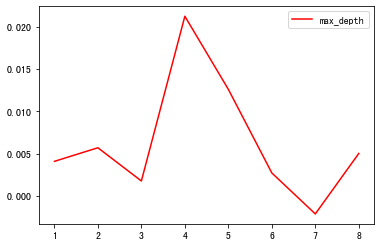

In [6]:
from sklearn.tree import DecisionTreeRegressor

# 創建機器學習的model
y_eff = []
for i in range(8):
    rf = DecisionTreeRegressor(criterion='mse', 
                                max_depth=i+1, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features='auto', max_leaf_nodes=None,
                                random_state=0)
    
    tree_clf = rf.fit(dtrain_normalized,dtrain['profit'] > 1)
    score = rf.score(dtest_normalized,dtest['profit'] > 1)
    y_eff.append(score)
    
plt.plot(range(1,9),y_eff,color="red",label="max_depth")
plt.legend()
'''http://www.taroballz.com/2019/05/15/ML_decision_tree_detail/'''
plt.show()

# 分類能獲利的股票
# 用 normalised data train model
# rf.fit(dtrain_normalized, dtrain['profit'] > 1)

In [7]:
# 4為最佳解
rf = DecisionTreeRegressor(criterion='mse', 
                            max_depth=4, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None,
                            random_state=None)
tree_clf = rf.fit(dtrain_normalized,dtrain['profit'])
# print(tree_clf.decision_path(dtrain[features]))

In [18]:
estimator_limited_5 = rf.estimators_[5]

In [19]:
estimator_limited_3 = rf.estimators_[3]

In [71]:
dtrain[features].columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'D1', 'D2', 'D3', 'D4', 'D5', 'EPS'],
      dtype=object)

In [89]:
# https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited_3, out_file='tree_limited_3_normalise.dot', feature_names = dtrain[features].columns.values,
                class_names = np.array(['True','False']),
                rounded = True, proportion = False, precision = 2, filled = True)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_pred = tree_clf.predict(dtrain_normalized)
test_pred = tree_clf.predict(dtest_normalized)
test_pred

print('MSE train : %2f | MSE test: %2f' % (mean_squared_error(dtrain['profit'],train_pred),mean_squared_error(dtest['profit'],test_pred)))
print('R^2 train : %2f | R^2 test: %2f' % (r2_score(dtrain['profit'],train_pred),r2_score(dtest['profit'],test_pred)))


MSE train : 0.031889 | MSE test: 0.025345
R^2 train : 0.259079 | R^2 test: 0.690302


In [10]:
from sklearn import metrics

test_pred = tree_clf.predict(dtest_normalized)

print('test data')
print('gain before filtered', dtest['profit'].mean())
print('gain after filtered', dtest['profit'][test_pred >1].mean())
print('num stocks', sum((test_pred >1)), '/', len(dtest))
print()


dbacktest_pred = tree_clf.predict(dbacktest_normalized)


print('backtest data')
print('gain before filtered', dbacktest['profit'].mean())
print('gain after filtered', dbacktest['profit'][dbacktest_pred > 1].mean())
print('num stocks', sum((dbacktest_pred >1)), '/', len(dbacktest))


test data
gain before filtered 0.9793892448108161
gain after filtered 1.032386081287617
num stocks 101 / 379

backtest data
gain before filtered 0.9890141804032317
gain after filtered 1.0417095855114613
num stocks 987 / 3840


In [11]:
# test_pred >1
dtest['profit'][test_pred >1]
sum(test_pred >1)
len(test_pred >1)
sum(dbacktest_pred >1)
len(dbacktest_pred >1)

3840

In [1]:
%matplotlib inline

dbacktest['prediction'] = pd.Series(dbacktest_pred, index=dbacktest.index)
dates = list(set(dbacktest['sell_date']))
dates.sort()


history = []
for d in dates:
    history.append(dbacktest[(dbacktest['sell_date'] == d) & (dbacktest['prediction'])]['profit'].mean())
    
pd.Series(history, index=dates).cumprod().plot()

NameError: name 'pd' is not defined

NameError: name 'history' is not defined

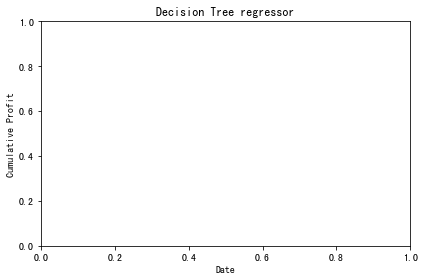

In [2]:
# 引入模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.title('Decision Tree regressor')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
# plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
# 避免被圖表元素被蓋住
plt.tight_layout()
plt.plot(list(pd.Series(history, index=dates).cumprod().index), pd.Series(history, index=dates).cumprod())
plt.xticks(rotation=45)
plt.savefig('profit_ptedict_normalizedata_decisiontreeregressor_performance.png')
plt.show()

In [47]:
features_df = pd.DataFrame(features)
feature_df = pd.DataFrame(feature)
feature_df = pd.concat([features_df,feature_df], axis = 1)
feature_df.columns = ['index', 'feature importances']
# feature_df

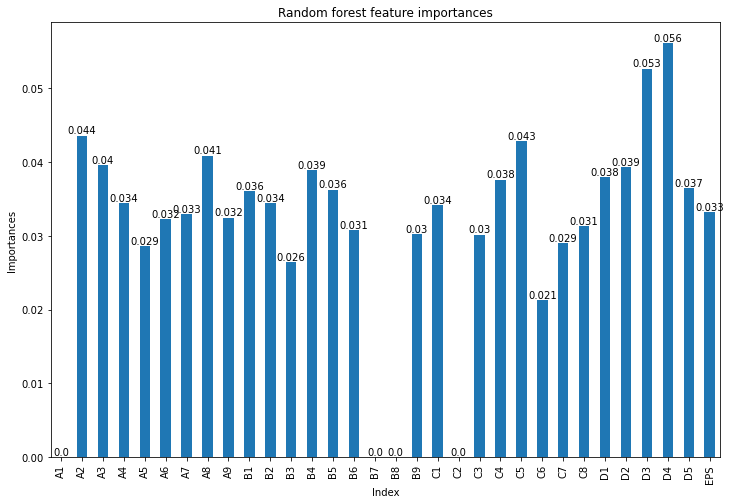

In [46]:
feature = rf.feature_importances_

feature_series = pd.Series(feature)

plt.figure(figsize = (12,8))
ax = feature_series.plot(kind = 'bar')
ax.set_title('Random forest feature importances')
ax.set_xlabel('Index')
ax.set_ylabel('Importances')
ax.set_xticklabels(features)

rects = ax.patches
labels = [round(i,3) for i in list(feature)]


for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
           ha = 'center', va = 'bottom')

plt.savefig('Feature_importances.png')
# plt.plot(features,feature)
